# cpNum=300の場合のbug、timeout、nullの比率分析（tree別）

このノートブックではcpNum=300の条件下でのバグ検出結果を分析し、**各tree値ごとに**bug、timeout、nullの発生比率を円グラフで可視化します。

各treeディレクトリ（tree=0, tree=500, tree=1000など）ごとに円グラフを作成します。


In [4]:
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict

# 日本語フォント設定
plt.rcParams['font.family'] = ['DejaVu Sans', 'Hiragino Sans', 'Yu Gothic', 'Meiryo', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']
plt.rcParams['font.size'] = 12


In [5]:
import glob

# treeディレクトリを検出
tree_dirs = glob.glob("Logs/tree=*")
tree_dirs.sort()

tree_dirs[1], tree_dirs[2] = tree_dirs[2], tree_dirs[1]

print(f"検出されたtreeディレクトリ: {tree_dirs}\n")

# 各treeの結果を保存
results_by_tree = {}

Num_params = [ 300 ]
range_params = [ 1, 50, 99 ]

# 各treeディレクトリごとに処理
for tree_dir in tree_dirs:
    tree_name = os.path.basename(tree_dir)
    print(f"処理中: {tree_name}")
    
    # カウンタを初期化
    bug_count = 0
    timeout_count = 0
    null_count = 0
    total = 0
    
    for idx in range(10):
        cpNum = [0] * 10
        cpNum_range = [0] * 10
        cpNum_dir = [1] * 10
        
        for Range in range(3):
            for Dir in range(1, 5):
                for Num in range(len(Num_params)):
                    result_dict = defaultdict(int)
                    cpNum[idx] = Num_params[Num]
                    cpNum_range[idx] = range_params[Range]
                    cpNum_dir[idx] = Dir
                    resultDirectoryName = ",".join(map(str, cpNum + cpNum_range + cpNum_dir))
                    
                    csv_path = os.path.join(tree_dir, resultDirectoryName, "detected_bugs.csv")
                    
                    if os.path.exists(csv_path):
                        with open(csv_path, "r") as csvfile:
                            reader = csv.reader(csvfile)
                            for row in reader:
                                total += 1
                                if row == ["null"]:
                                    null_count += 1
                                elif row == ["timeout"]:
                                    timeout_count += 1
                                else:
                                    bug_count += 1
    
    # 結果を保存
    results_by_tree[tree_name] = {
        'bug': bug_count,
        'timeout': timeout_count,
        'null': null_count,
        'total': total
    }
    
    print(f"  {tree_name} - Bug: {bug_count}, Timeout: {timeout_count}, Null: {null_count}, 合計: {total}\n")

print(f"全treeディレクトリの処理が完了しました！")


検出されたtreeディレクトリ: ['Logs/tree=0', 'Logs/tree=500', 'Logs/tree=1000']

処理中: tree=0
  tree=0 - Bug: 365, Timeout: 65, Null: 170, 合計: 600

処理中: tree=500
  tree=500 - Bug: 413, Timeout: 30, Null: 157, 合計: 600

処理中: tree=1000
  tree=1000 - Bug: 387, Timeout: 44, Null: 169, 合計: 600

全treeディレクトリの処理が完了しました！


findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Yu Gothic' not found

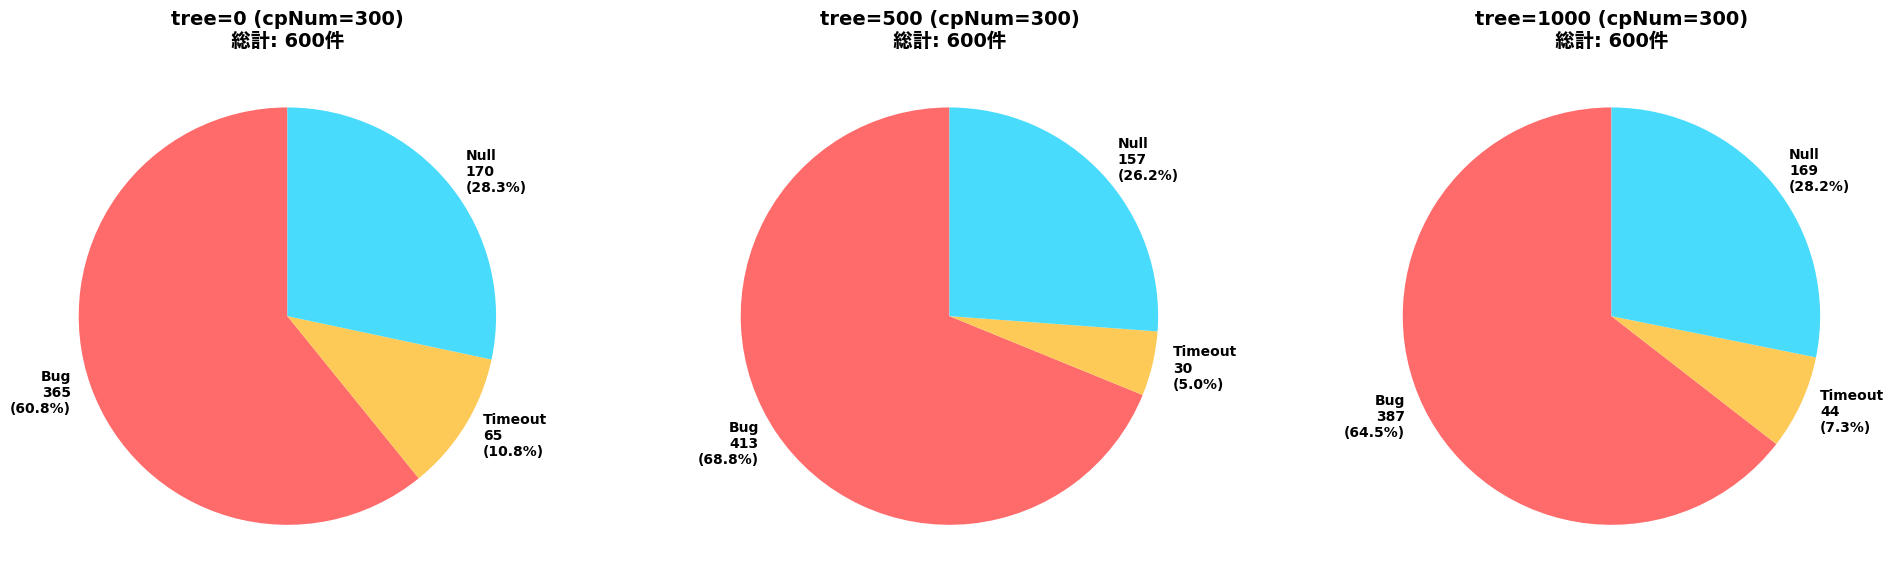

In [6]:
# cpNum=300の場合の各treeごとの円グラフを作成
fig = plt.figure(figsize=(20, 6))

# 各treeごとに円グラフを作成
for i, (tree_name, data) in enumerate(results_by_tree.items()):
    ax = fig.add_subplot(1, len(results_by_tree), i + 1)
    
    # データの準備
    bug = data['bug']
    timeout = data['timeout']
    null = data['null']
    total = data['total']
    
    # 円グラフのデータ
    sizes = [bug, timeout, null]
    labels = [f'Bug\n{bug}\n({bug/total*100:.1f}%)', 
              f'Timeout\n{timeout}\n({timeout/total*100:.1f}%)', 
              f'Null\n{null}\n({null/total*100:.1f}%)']
    colors = ['#ff6b6b', '#feca57', '#48dbfb']
    explode = (0.05, 0.05, 0.05)  # 各セグメントを少し分離
    
    # 円グラフを作成
    wedges, texts, autotexts = ax.pie(sizes, labels=labels, colors=colors, 
                                       autopct='', startangle=90)
    
    # タイトルを設定
    ax.set_title(f'{tree_name} (cpNum=300)\n総計: {total}件', fontsize=14, fontweight='bold')
    
    # テキストのスタイルを調整
    for text in texts:
        text.set_fontsize(10)
        text.set_fontweight('bold')

plt.tight_layout()
plt.show()


findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Yu Gothic' not found

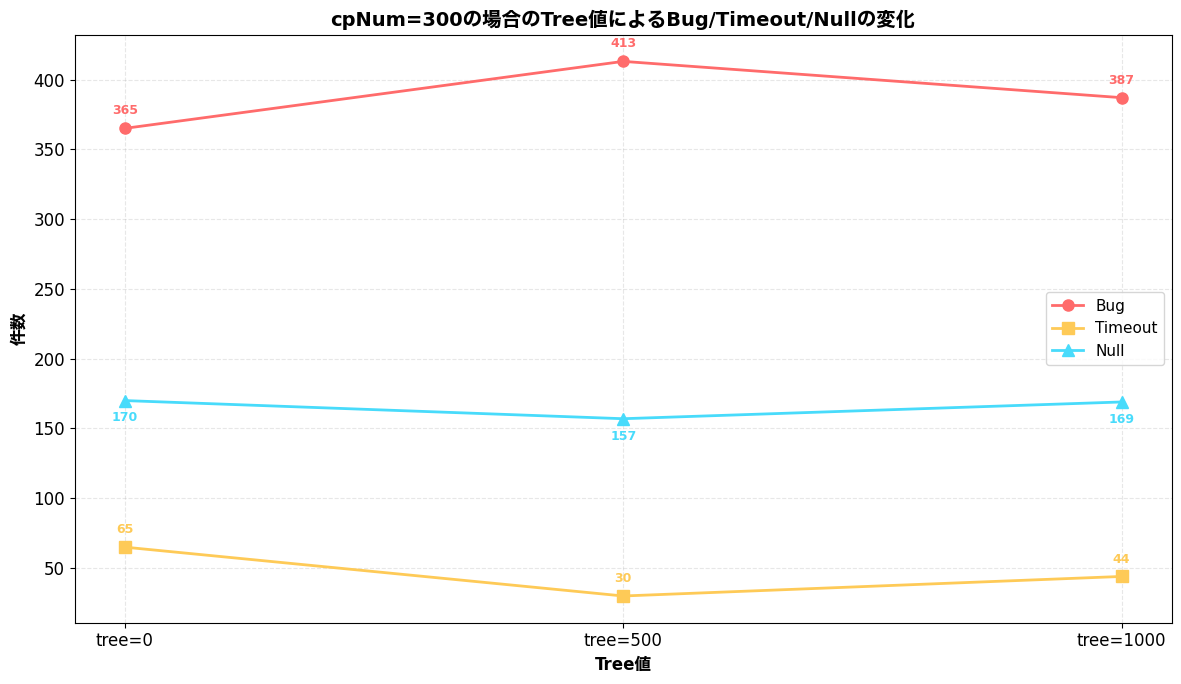


=== Tree値による変化のサマリー ===
Tree値      Bug        Timeout    Null      
---------------------------------------------
tree=0    365        65         170       
tree=500  413        30         157       
tree=1000 387        44         169       


In [7]:
# Bug、Null、Timeoutの数がtreeの値によってどう変化するかを折れ線グラフで可視化
fig, ax = plt.subplots(figsize=(12, 7))

# treeの値を数値として抽出してソート
tree_values = []
bug_counts = []
timeout_counts = []
null_counts = []

for tree_name, data in sorted(results_by_tree.items(), key=lambda x: int(x[0].split('=')[1])):
    tree_value = int(tree_name.split('=')[1])
    tree_values.append(tree_value)
    bug_counts.append(data['bug'])
    timeout_counts.append(data['timeout'])
    null_counts.append(data['null'])

# 折れ線グラフを作成
ax.plot(tree_values, bug_counts, marker='o', linewidth=2, markersize=8, label='Bug', color='#ff6b6b')
ax.plot(tree_values, timeout_counts, marker='s', linewidth=2, markersize=8, label='Timeout', color='#feca57')
ax.plot(tree_values, null_counts, marker='^', linewidth=2, markersize=8, label='Null', color='#48dbfb')

# グラフの設定
ax.set_xlabel('Tree値', fontsize=12, fontweight='bold')
ax.set_ylabel('件数', fontsize=12, fontweight='bold')
ax.set_title(f'cpNum={Num_params[0]}の場合のTree値によるBug/Timeout/Nullの変化', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, linestyle='--')
ax.legend(fontsize=11, loc='best')

# X軸の目盛りを設定
ax.set_xticks(tree_values)
ax.set_xticklabels([f'tree={v}' for v in tree_values])

# 各ポイントに値を表示
for i, (bug, timeout, null) in enumerate(zip(bug_counts, timeout_counts, null_counts)):
    ax.annotate(f'{bug}', (tree_values[i], bug), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=9, fontweight='bold', color='#ff6b6b')
    ax.annotate(f'{timeout}', (tree_values[i], timeout), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=9, fontweight='bold', color='#feca57')
    ax.annotate(f'{null}', (tree_values[i], null), textcoords="offset points", 
                xytext=(0,-15), ha='center', fontsize=9, fontweight='bold', color='#48dbfb')

plt.tight_layout()
plt.show()

# データのサマリーを表示
print("\n=== Tree値による変化のサマリー ===")
print(f"{'Tree値':<10} {'Bug':<10} {'Timeout':<10} {'Null':<10}")
print("-" * 45)
for tree_val, bug, timeout, null in zip(tree_values, bug_counts, timeout_counts, null_counts):
    print(f"tree={tree_val:<4} {bug:<10} {timeout:<10} {null:<10}")
